## Pytorch Workflow

![image.png](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/01_a_pytorch_workflow.png)


In [1]:
import torch
from torch import nn # nn contains neural network packages in PyTroch
import matplotlib.pyplot as plt
import seaborn as sns

torch.__version__

'2.5.1+cu118'

<b> Data (Preparing and Loading into) </b>
 
Data can be almost anything in ML...

Excel Sheets , Images , Videos , Audio , Text and many more...

ML is game of two parts : 
1. Get Data into numerical representation.
2. Building a model to learn patterns in numerical data.

Using *Linear Regression* formula to make a straight line on known data , with known **parameters** of the formula

In [2]:
# known parameters

weight = 0.8 # Bi from eq. y = B0 * sum(Bi*xi) [slope]
bias = 0.4 # B0 from eq. y = B0 * sum(Bi*xi) [y intercept]

X = torch.arange(0 , 1 , 0.03).unsqueeze(dim=1)
y = bias + (weight * X) # Simple Linear Regression formulation.

X[:10] , y[:10]

(tensor([[0.0000],
         [0.0300],
         [0.0600],
         [0.0900],
         [0.1200],
         [0.1500],
         [0.1800],
         [0.2100],
         [0.2400],
         [0.2700]]),
 tensor([[0.4000],
         [0.4240],
         [0.4480],
         [0.4720],
         [0.4960],
         [0.5200],
         [0.5440],
         [0.5680],
         [0.5920],
         [0.6160]]))

In [3]:
len(X) , len(y)

(34, 34)

<b> Making *Traning* and *Testing* splits of data for traning our model. </b>

In [4]:
train_split = int(0.8 * len(X))
train_split

27

In [5]:
test_split = int(0.2 * len(y))
test_split

6

In [6]:
X_train , y_train , X_test , y_test = X[:train_split] , y[:train_split] , X[train_split:] , y[train_split:]

<b>Visualizing Data</b>

In [11]:
"""Plots traning data , test data and predictions"""
def plot_predictions(X_train , y_train , X_test , y_test , preds=None):
    plt.figure(figsize=(12 , 8) , dpi=100)
    plt.scatter(X_train , y_train  , label="Training Data")
    plt.scatter(X_test , y_test , c='g' , label="Testing Data")
    plt.legend()

    if preds is not None:
        plt.scatter(X_test , preds , c='r')

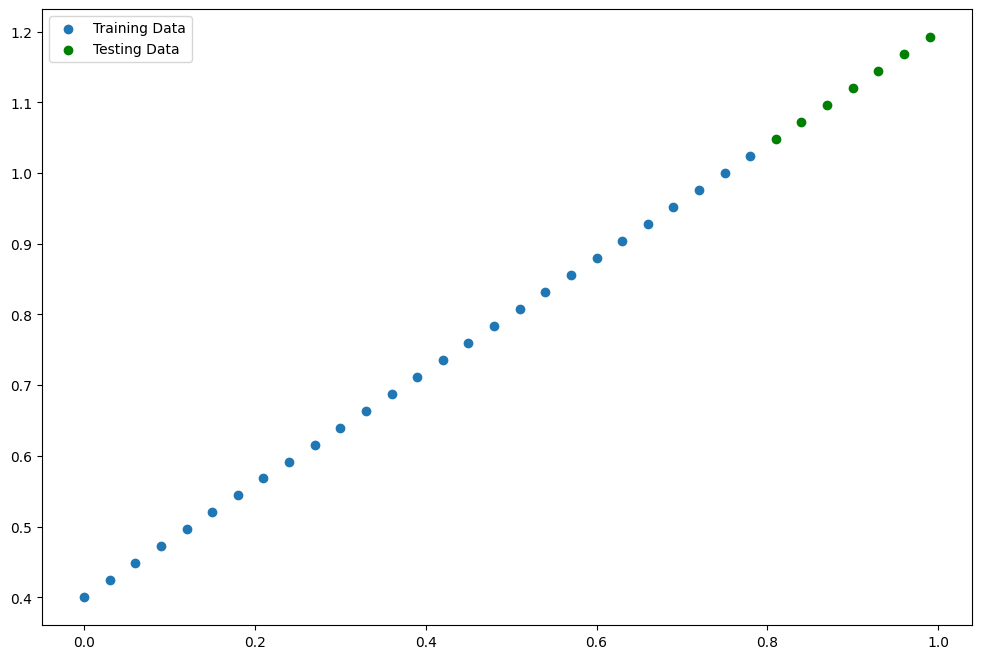

In [12]:
plot_predictions(X_train , y_train , X_test , y_test)

<b>Building a PyTorch Regression Model</b>

This model starts with random values (weights and bias ) , Looks at training data and adjust the random values to better represent (or getting closer to) our **known Values of Weights and Bias**

It does this through 2 main algorithms:
1. Gradient Descent.
2. Back Propogation.

Both Algorithms are already implemented in PyTorch

In [ ]:
# Linear Regression Model Class

# nn.Parameter() : A kind of Tensor that is to be considered a module parameter. Parameters are ~torch.Tensor subclasses, that have a
# very special property when used with Module s - when they're assigned as Module attributes they are automatically added to the list of
# its parameters, and will appear e.g. in ~Module.parameters iterator.

class LinearRegression(nn.Module): # <- Almost everything builds up from nn.Module in PyTroch
    def __init__(self):
        super().__init__()

        # making a random tensor parameters ( for gradient descent 'requires_grad=True' is set)
        self.weights = nn.Parameter(torch.rand(1 , requires_grad=True , dtype=torch.float))
        self.bias = nn.Parameter(torch.rand(1 , requires_grad=True , dtype=torch.float)) 

        # When Computations run PyTorch keeps track of gradient of these parameters and updates 
        # them through combination of Gradient Descent and BackPropogation.


    """ forward method to define computation in the model """
    def forward(self , x:torch.Tensor) -> torch.Tensor:
        return self.bias + (self.weights * x) # Linear Regression Formulation